<a href="https://colab.research.google.com/github/Yadukrishnan1/Time-Series/blob/main/flights_passengers_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
sns.set()
airline_data = sns.load_dataset("flights")

airline_data


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [3]:
# Convert the 'year' and 'month' columns to datetime and set as the index
airline_data['date'] = pd.to_datetime(airline_data['year'].astype(str) + '-' + airline_data['month'].astype(str) + '-01')
airline_data.set_index('date', inplace=True)

airline_data

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461


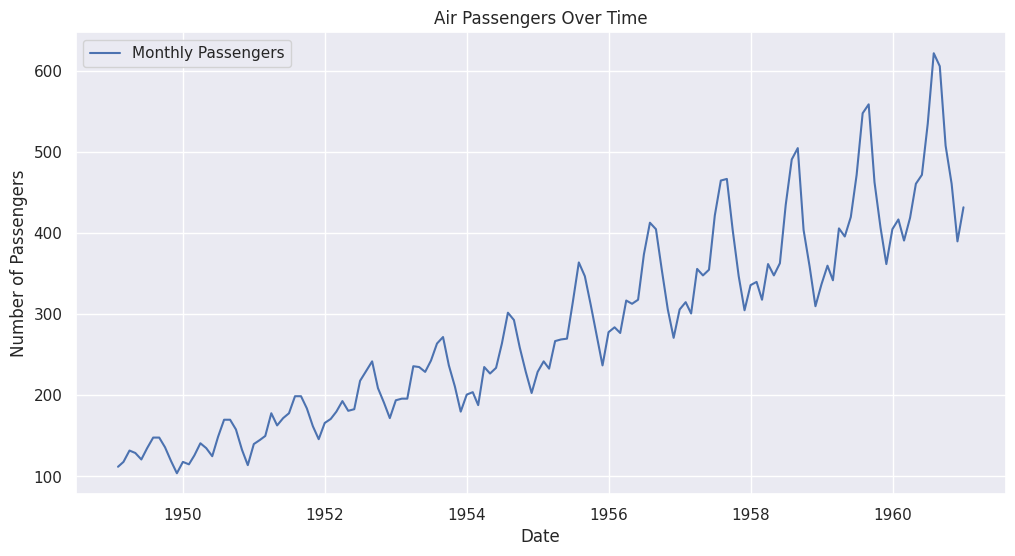

In [4]:
# Resample the data to monthly frequency
airline_data = airline_data['passengers'].resample('M').sum()

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(airline_data.index, airline_data, label='Monthly Passengers')
plt.title('Air Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 449.144925877054


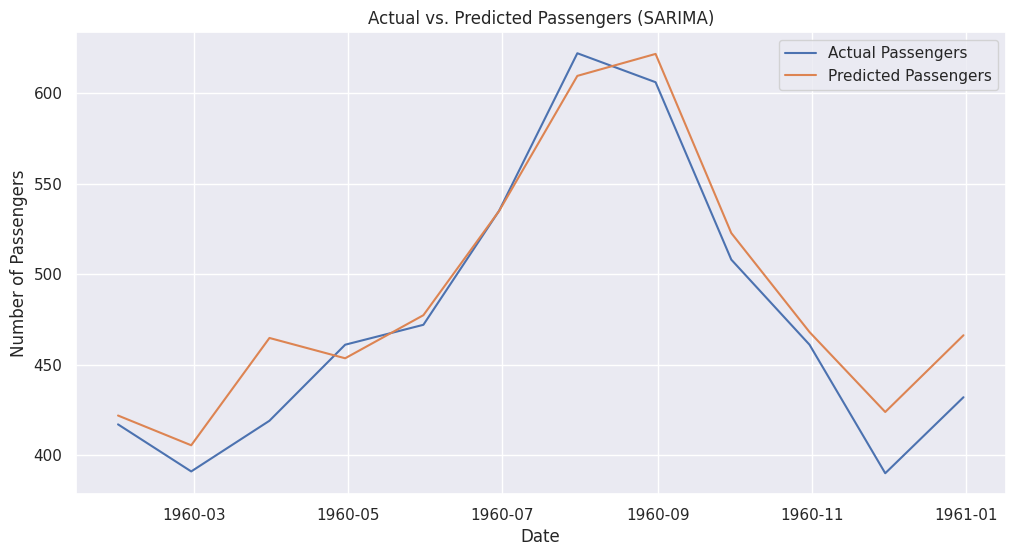

In [6]:
# Train-Test Split
train_size = len(airline_data) - 12
train, test = airline_data[:train_size], airline_data[train_size:]

# Model Training
order = (1, 1, 1)  # (p, d, q), adjust based on your data
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S), adjust based on your data
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# Model Prediction and Evaluation
predictions = fit_model.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(test, predicted_values)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs. actual passengers
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Passengers')
plt.plot(test.index, predicted_values, label='Predicted Passengers')
plt.title('Actual vs. Predicted Passengers (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
